Train, test and validation data normalized to:
[1.]
[0.99839183]
[1.00500158]
Using Device:  cpu , dtype:  torch.float32

Raw data shape:  (31090, 1, 32) 
Labels shape:  (31090,) 
Unique labels:  [0 1 2 3 4] 
Shape of test set: (4664, 8, 4) 
Shape of train set: (22462, 8, 4) 
Shape of validation set: (3964, 8, 4) 
Fraction of single class in test set:  0.2388507718696398 
dtype of inputs:  torch.float32
End of epoch 1:loss_tr=1.590, loss_val=1.588, train=24.3%, val=25.2%
End of epoch 2:loss_tr=1.402, loss_val=1.400, train=38.9%, val=39.7%
End of epoch 3:loss_tr=1.300, loss_val=1.294, train=45.0%, val=46.1%
End of epoch 4:loss_tr=1.245, loss_val=1.246, train=48.2%, val=48.7%
End of epoch 5:loss_tr=1.195, loss_val=1.195, train=49.4%, val=50.1%
End of epoch 6:loss_tr=1.174, loss_val=1.174, train=51.1%, val=51.2%
End of epoch 7:loss_tr=1.151, loss_val=1.159, train=51.8%, val=51.7%
End of epoch 8:loss_tr=1.151, loss_val=1.154, train=51.3%, val=51.4%
End of epoch 9:loss_tr=1.131, loss_val=1.

End of epoch 113:loss_tr=0.910, loss_val=0.916, train=63.0%, val=62.6%
End of epoch 114:loss_tr=0.896, loss_val=0.900, train=64.0%, val=64.0%
End of epoch 115:loss_tr=0.901, loss_val=0.908, train=63.9%, val=63.9%
End of epoch 116:loss_tr=0.897, loss_val=0.907, train=64.3%, val=63.6%
End of epoch 117:loss_tr=0.898, loss_val=0.897, train=63.3%, val=63.5%
End of epoch 118:loss_tr=0.897, loss_val=0.910, train=63.8%, val=63.2%
End of epoch 119:loss_tr=0.877, loss_val=0.884, train=65.0%, val=63.9%
End of epoch 120:loss_tr=0.870, loss_val=0.879, train=65.3%, val=64.5%
End of epoch 121:loss_tr=0.882, loss_val=0.892, train=64.2%, val=63.7%
End of epoch 122:loss_tr=0.886, loss_val=0.885, train=64.4%, val=63.6%
End of epoch 123:loss_tr=0.886, loss_val=0.898, train=64.5%, val=64.0%
End of epoch 124:loss_tr=0.875, loss_val=0.881, train=65.2%, val=65.2%
End of epoch 125:loss_tr=0.868, loss_val=0.879, train=65.7%, val=64.7%
End of epoch 126:loss_tr=0.876, loss_val=0.885, train=65.2%, val=64.6%
End of

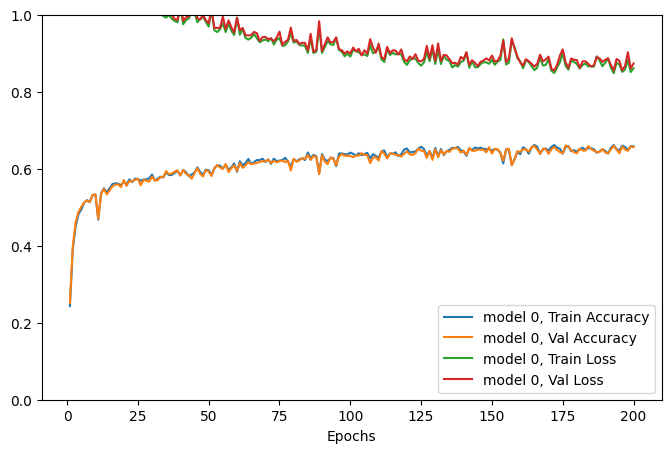

In [1]:
# A notebook for simple lstm exploration
# Case of single lstm cell
from peratouch.core_funcs import Data, Trainer, plot_train, test_accuracy
from peratouch.networks import lstm
from peratouch.config import datapath_five_users

input_size = 4 
D = Data(datapath_five_users, triggers=True, releases=False)
D.split()
D.normalize()
D.reshape_for_lstm(input_size=input_size, sliding=False)
D.tensors_to_device()
D.print_shapes()
model = lstm(input_size=input_size, hidden_size=16, out_size=5, global_pool=True) 
T = Trainer(D)
T.setup(model, learning_rate=1e-2, weight_decay=1e-3, batch_size=2*256, max_epochs=200, verbose=True)
T.train_model(model)

plot_train([T])
test_accuracy([D], [model])

In [4]:
# Look at 3 triggers
from peratouch.core_funcs import Data, Trainer, plot_train, test_accuracy
from peratouch.networks import lstm
from peratouch.config import datapath_five_users

D = Data(datapath_five_users, triggers=True, releases=False)
D.split()
D.normalize()
D.resample_random_combinations(aug_factor=2)
D.tensors_to_device()
D.print_shapes()

Train, test and validation data normalized to:
[1.]
[0.99839183]
[1.00500158]
Using Device:  cpu , dtype:  torch.float32

Raw data shape:  (31090, 1, 32) 
Labels shape:  (31090,) 
Unique labels:  [0 1 2 3 4] 
Shape of test set: (9328, 3, 32) 
Shape of train set: (44924, 3, 32) 
Shape of validation set: (7928, 3, 32) 
Fraction of single class in test set:  0.2388507718696398 
dtype of inputs:  torch.float32


End of epoch 1:loss_tr=1.604, loss_val=1.603, train=24.3%, val=25.2%
End of epoch 2:loss_tr=1.601, loss_val=1.599, train=24.3%, val=25.2%
End of epoch 3:loss_tr=1.599, loss_val=1.597, train=24.3%, val=25.2%
End of epoch 4:loss_tr=1.595, loss_val=1.594, train=24.3%, val=25.2%
End of epoch 5:loss_tr=1.588, loss_val=1.587, train=24.3%, val=25.2%
End of epoch 6:loss_tr=1.573, loss_val=1.571, train=26.3%, val=27.3%
End of epoch 7:loss_tr=1.539, loss_val=1.538, train=30.8%, val=31.4%
End of epoch 8:loss_tr=1.461, loss_val=1.464, train=38.1%, val=37.6%
End of epoch 9:loss_tr=1.382, loss_val=1.381, train=40.2%, val=40.3%
End of epoch 10:loss_tr=1.299, loss_val=1.299, train=43.5%, val=43.6%
End of epoch 11:loss_tr=1.237, loss_val=1.239, train=46.5%, val=46.7%
End of epoch 12:loss_tr=1.198, loss_val=1.202, train=52.1%, val=52.8%
End of epoch 13:loss_tr=1.177, loss_val=1.183, train=53.6%, val=54.7%
End of epoch 14:loss_tr=1.140, loss_val=1.139, train=54.4%, val=54.9%
End of epoch 15:loss_tr=1.119

End of epoch 118:loss_tr=0.679, loss_val=0.688, train=71.6%, val=71.9%
End of epoch 119:loss_tr=0.667, loss_val=0.677, train=72.4%, val=72.4%
End of epoch 120:loss_tr=0.679, loss_val=0.683, train=71.6%, val=71.8%
End of epoch 121:loss_tr=0.666, loss_val=0.679, train=72.1%, val=72.2%
End of epoch 122:loss_tr=0.677, loss_val=0.689, train=72.1%, val=72.0%
End of epoch 123:loss_tr=0.666, loss_val=0.674, train=72.5%, val=72.6%
End of epoch 124:loss_tr=0.737, loss_val=0.739, train=68.5%, val=68.6%
End of epoch 125:loss_tr=0.672, loss_val=0.678, train=72.1%, val=72.4%
End of epoch 126:loss_tr=0.664, loss_val=0.675, train=72.3%, val=72.1%
End of epoch 127:loss_tr=0.665, loss_val=0.678, train=72.4%, val=72.4%
End of epoch 128:loss_tr=0.665, loss_val=0.673, train=72.4%, val=72.6%
End of epoch 129:loss_tr=0.664, loss_val=0.678, train=72.3%, val=72.3%
End of epoch 130:loss_tr=0.663, loss_val=0.674, train=72.8%, val=72.6%
End of epoch 131:loss_tr=0.663, loss_val=0.674, train=72.6%, val=72.5%
End of

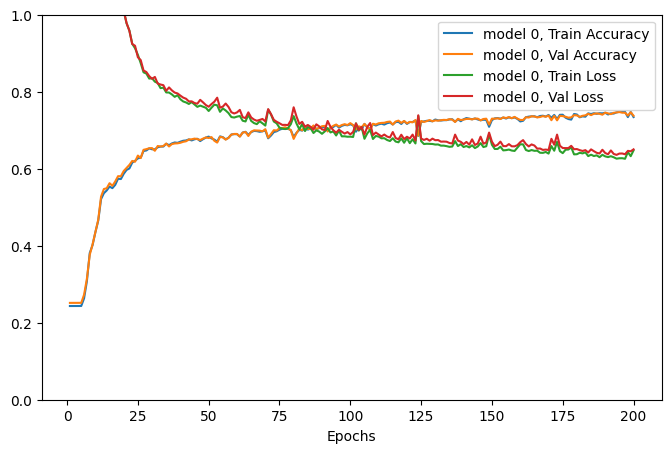

In [5]:
model = lstm(input_size=32, hidden_size=5, out_size=5) 
T = Trainer(D)
T.setup(model, learning_rate=1e-2, weight_decay=1e-3, batch_size=5000, max_epochs=200, verbose=True)
T.train_model(model)

plot_train([T])
test_accuracy([D], [model])

In [ ]:
# --------- Cells with some scribles ------------

# This function can be used to look at a sliding window 
# Not better performing than just using a split (i.e. no stride==input_size)
def change_input(x, I, S):
    """I is window size, S is stride"""

    # Make a mask used to transform inputs 
    bs = x.shape[0]
    W = x.shape[-1] 
    L = int((W - I) / S + 1)

    mask = np.full((L, W), False)
    mask[0, :I] = True 
    for i in range(1, L):
        mask[i] = np.roll(mask[i-1], shift=S)

    result = np.zeros((bs, L, I))
    x = x * np.ones((1, L, 1))  # multiply by ones to extend shape
    for i in range(bs):
        result[i] = x[i][mask].reshape((L, I))
    return result

In [20]:
# Exploring some reshaping
import numpy as np
x = np.arange(50).reshape((5, 1, 10))
print(x)
res = []
input_size = 5
for i in range(x.shape[-1] - input_size + 1):
    res.append(x[:, :, i:i+input_size])
x = np.concatenate(res, axis=1)
print("Reshaped:\n", x)
print(x.shape)

[[[ 0  1  2  3  4  5  6  7  8  9]]

 [[10 11 12 13 14 15 16 17 18 19]]

 [[20 21 22 23 24 25 26 27 28 29]]

 [[30 31 32 33 34 35 36 37 38 39]]

 [[40 41 42 43 44 45 46 47 48 49]]]
Reshaped:
 [[[ 0  1  2  3  4]
  [ 1  2  3  4  5]
  [ 2  3  4  5  6]
  [ 3  4  5  6  7]
  [ 4  5  6  7  8]
  [ 5  6  7  8  9]]

 [[10 11 12 13 14]
  [11 12 13 14 15]
  [12 13 14 15 16]
  [13 14 15 16 17]
  [14 15 16 17 18]
  [15 16 17 18 19]]

 [[20 21 22 23 24]
  [21 22 23 24 25]
  [22 23 24 25 26]
  [23 24 25 26 27]
  [24 25 26 27 28]
  [25 26 27 28 29]]

 [[30 31 32 33 34]
  [31 32 33 34 35]
  [32 33 34 35 36]
  [33 34 35 36 37]
  [34 35 36 37 38]
  [35 36 37 38 39]]

 [[40 41 42 43 44]
  [41 42 43 44 45]
  [42 43 44 45 46]
  [43 44 45 46 47]
  [44 45 46 47 48]
  [45 46 47 48 49]]]
(5, 6, 5)
